# Research Question
**Is there an underlying pattern of features that makes franchise movies successful? If so, what makes franchise movies different from non-franchise movies?**

2-3: Do actors of certain ethnicity/gender groups play particular personas more frequently? Are they depicted positively (hero/heroine) or negatively (villain) in the movie?

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
from src.data.utils import get_franchise_movies, get_franchise_data, clean_character_metadata, custom_autopct, get_inflation_rate, get_movie, get_genre_counts

Load data

In [ ]:
#loading the inflation rate data set from the columbia bank 
inflation_rate_df=get_inflation_rate()
#loading the complete data set 
movies_df_raw = pd.read_csv('data/movie_metadata_with_tmdb.csv')
#loading the data set for the franchise movies 
franchise_df=get_franchise_movies(movies_df_raw,inflation_rate_df,'data/missing_dates_manualsearch.csv')
#Data frame with all the movies with processing
movies_df=get_movie(movies_df_raw,inflation_rate_df)
#Data frame with movies that are not part of a franchise
movies_no_franchise_df = movies_df[movies_df['collection_id'].isna()].reset_index(drop=True)

In [25]:
col_names = [
    'Wikipedia_movie_ID', 'Freebase_movie_ID', 'Movie_release_date', 'Character_name', 
    'Actor_date_of_birth', 'Actor_gender', 'Actor_height_m', 'Actor_ethnicity_Freebase_ID', 
    'Actor_name', 'Actor_age_at_movie_release', 'Freebase_character_actor_map_ID', 
    'Freebase_character_ID', 'Freebase_actor_ID'
]

col_for_dropna = ['Wikipedia_movie_ID', 'Freebase_movie_ID', 'Movie_release_date',
                  'Actor_gender', 'Actor_name', 'Freebase_character_actor_map_ID',
                  'Freebase_actor_ID']

# plot_df = pd.read_csv('../data/plot_summaries.txt', sep='\t', header=None, names=['Wikipedia_movie_ID', 'summary_plot'])
character_df = pd.read_csv('data/character.metadata.tsv', names=col_names, sep='\t')
character_df = clean_character_metadata(character_df, mapping_path='data/ethnicity_mapping.csv', columns=col_for_dropna)

Dropping rows with missing values in any of ['Wikipedia_movie_ID', 'Freebase_movie_ID', 'Movie_release_date', 'Actor_gender', 'Actor_name', 'Freebase_character_actor_map_ID', 'Freebase_actor_ID'].
Number of rows dropped: 55467
395202 rows remaining.


In [33]:
# only keep characters from franchise movies
franchise_char_df = character_df[character_df['Wikipedia_movie_ID'].isin(franchise_df['Wikipedia movie ID'])].reset_index(drop=True)
# only keep characters from non-franchise movies
non_franchise_char_df = character_df[~character_df['Wikipedia_movie_ID'].isin(franchise_df['Wikipedia movie ID'])].reset_index(drop=True)

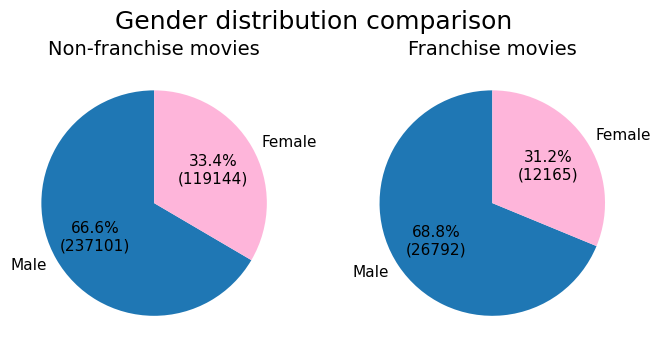

In [43]:
# Calculate the proportion of each gender for character_df
gender_proportion_non_fr = non_franchise_char_df['Actor_gender'].value_counts()

# Calculate the proportion of each gender for fr_character_df
gender_proportion_franchise = franchise_char_df['Actor_gender'].value_counts()

# Plot the gender proportions as pie charts side by side
fig, axes = plt.subplots(1, 2, figsize=(8, 4))

# Plot for character_df
gender_proportion_non_fr.plot(kind='pie', ax=axes[0], autopct=custom_autopct(gender_proportion_non_fr),
                           startangle=90, labels=['Male', 'Female'], colors=['#1f77b4', '#feb5da'], fontsize=11)
axes[0].set_ylabel('')
axes[0].set_title('Non-franchise movies', fontsize=14)

# Plot for fr_character_df
gender_proportion_franchise.plot(kind='pie', ax=axes[1], autopct=custom_autopct(gender_proportion_franchise),
                                 startangle=90, labels=['Male', 'Female'], colors=['#1f77b4', '#feb5da'],
                                 fontsize=11)
axes[1].set_ylabel('')
axes[1].set_title('Franchise movies', fontsize=14)

# Set overarching title
fig.suptitle('Gender distribution comparison', fontsize=18)

plt.show()

Ok, so the gender proportion are more or less the same.

What about ethnicity? Are there any differences in the distribution?